In [77]:
import numpy as np
import control
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
from control_utils import *

In [5]:
A = np.array([
    [0, 1], 
    [-3, -2]
])
B = np.array([
    [0],
    [1]
])
C = np.array([[1,0]])
D = 0
sys = control.ss(A, B, C, D)
sys

StateSpace(array([[ 0.,  1.],
       [-3., -2.]]), array([[0.],
       [1.]]), array([[1., 0.]]), array([[0.]]))

In [74]:
zeta = 0.7
wn = 4
eigenvalues = np.roots([1, 2*zeta*wn,  wn**2]).tolist()
eigenvalues.append(5*np.real(eigenvalues[0]))

In [75]:
A_hat = np.block([[A, np.zeros_like(C.T)],[-C, 0]]);
B_hat = np.block([[B],[0]]);
K_hat = control.acker(A_hat, B_hat, eigenvalues);
K_contr = K_hat[:, :2]
k_contr_i = -K_hat[0, -1]
eigenvalues_servo = np.linalg.eig(A_hat-B_hat*K_hat)[0];

{'Mp': 4.360750278270308,
 'tp': 1.187,
 'ts5': 0.808,
 'ts2': 1.567,
 'tr': 0.556,
 'td': 0.43,
 'ess': -9.49906819869284e-13,
 'final_value_step_simulated': 1.00000000000095,
 'final_value_step_theoretical': -1}

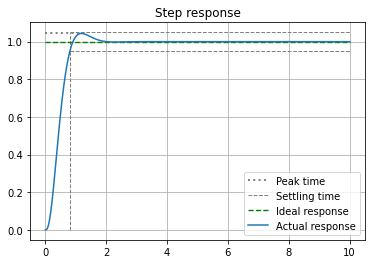

In [79]:
AA_contr = np.block([[A-B*K_contr, B*k_contr_i],[-C, 0]]) 
BB_contr = np.concatenate((np.zeros((AA_contr.shape[0]-1,1)), [[1]]))
CC_contr = np.matrix(np.concatenate((C[0, :], [0.0])))
DD_contr = np.matrix([0.0])
sys_contr = control.ss(AA_contr, BB_contr, CC_contr, DD_contr)
step_info(sys_contr, tfinal=10)

In [80]:
Mp = np.exp(-np.pi*zeta/(np.sqrt(1-zeta**2)))
print(Mp)
tp = np.pi/(wn*np.sqrt(1-zeta**2))
print(tp)

0.04598791026026775
1.0997774062376235
